# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다. 

관련된 라이브러리를 가져옵니다. 
request는 웹 통신을 위해서 가져오고 
BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. 
ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소를 설정합니다. 

In [2]:
subscription_key = "7336b3e4728844948099b4a501be3de5"

In [3]:
face_api_url='https://winkeyface.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인 합니다. 

In [4]:
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

In [5]:
face_image = requests.get(image_url)

In [6]:
img = Image.open(BytesIO(face_image.content))

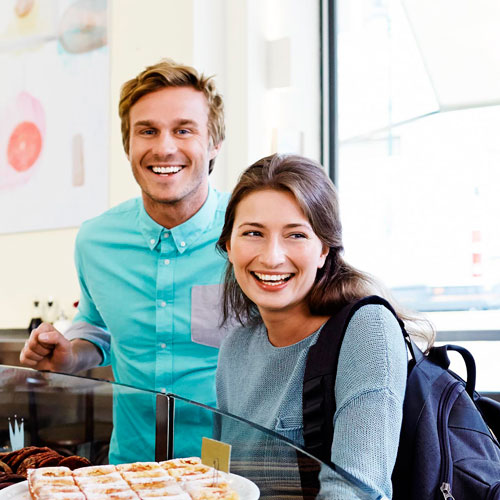

In [7]:
img

헤더 정보를 설정합니다. 

In [8]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

In [9]:
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender'
}

In [10]:
data = {'url': image_url}

서비스를 호출해서 결과를 확인 합니다. 

In [11]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

In [12]:
faces

[{'faceAttributes': {'age': 32.0, 'gender': 'female'},
  'faceId': '8942683e-87ca-4b67-a06d-46dc6c2f3ba8',
  'faceRectangle': {'height': 91, 'left': 228, 'top': 208, 'width': 91}},
 {'faceAttributes': {'age': 31.0, 'gender': 'male'},
  'faceId': '037012ae-85a8-49cf-94eb-5d50b456314a',
  'faceRectangle': {'height': 79, 'left': 125, 'top': 109, 'width': 79}}]

얼굴에 사각형을 그리고 나이와 성별을 나타내는 함수를 만든다.

In [14]:
def CreatImage(faces):
    for face in faces:
        #Convert width height to a point in a rectangle
        rect = face['faceRectangle']
        left = rect['left']
        top = rect['top']
        bottom = left + rect['height']
        right = top + rect['width']

        draw.rectangle(((left, top), (bottom, right)), outline='red')

        #Font location 
        fontX = rect['left']
        fontY = left + rect['height'] - 18

        #Face attributes
        face_info = face['faceAttributes']
        gender = face_info['gender']
        
        age = face_info['age']
        result = "Gender: " + gender + " Age: " + str(age)

        draw.text((fontX, fontY), result, fill='red')

In [15]:
draw = ImageDraw.Draw(img)

In [16]:
CreatImage(faces)

In [17]:
img.show()

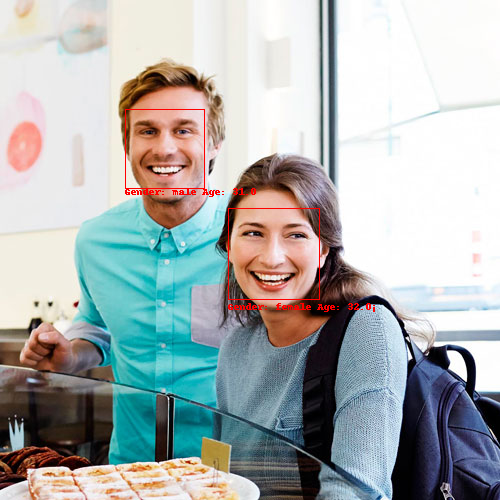

In [18]:
img

화면속의 사람들의 감정을 분석하기 위해서 emotion 속성으로 호출한다. 

In [19]:
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'emotion'
}

In [20]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

In [21]:
faces

[{'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}},
  'faceId': '7b3c4fe5-8e83-4e96-9759-17623c7e5867',
  'faceRectangle': {'height': 91, 'left': 228, 'top': 208, 'width': 91}},
 {'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}},
  'faceId': '68fb7645-4b82-49f9-99cc-355649af7126',
  'faceRectangle': {'height': 79, 'left': 125, 'top': 109, 'width': 79}}]